In [1]:
# importing NumPy, Pandas, Math, Matplotlib, and Font Libraries

import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.image as image
from matplotlib import artist
import matplotlib.patches as mpatches
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib.patches import Arc
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Franklin Gothic Medium', 'Franklin Gothic Book']

In [2]:
from matplotlib import transforms


def rainbow_text(x, y, strings, colors, orientation='horizontal',
                 ax=None, **kwargs):
    """
    Take a list of *strings* and *colors* and place them next to each
    other, with text strings[i] being shown in colors[i].

    Parameters
    ----------
    x, y : float
        Text position in data coordinates.
    strings : list of str
        The strings to draw.
    colors : list of color
        The colors to use.
    orientation : {'horizontal', 'vertical'}
    ax : Axes, optional
        The Axes to draw into. If None, the current axes will be used.
    **kwargs
        All other keyword arguments are passed to plt.text(), so you can
        set the font size, family, etc.
    """
    if ax is None:
        ax = plt.gca()
    t = ax.transData
    canvas = ax.figure.canvas

    assert orientation in ['horizontal', 'vertical']
    if orientation == 'vertical':
        kwargs.update(rotation=90, verticalalignment='center', horizontalalignment='center')

    for s, c in zip(strings, colors):
        text = ax.text(x, y, s + " ", color=c, transform=t, **kwargs)

        # Need to draw to update the text position.
        text.draw(canvas.get_renderer())
        ex = text.get_window_extent()
        if orientation == 'horizontal':
            t = transforms.offset_copy(
                text.get_transform(), x=ex.width, units='dots')
        else:
            t = transforms.offset_copy(
                text.get_transform(), y=ex.height, units='dots')

In [3]:
df = pd.read_excel('dataset/Goal and Assists per 90.xlsx')
df['goal per 90'] = df['goal per 90'].astype(float, errors = 'raise')
df['assists per 90'] = df['assists per 90'].astype(float, errors = 'raise')
df

,player,team,goal,assists,goal per 90,assists per 90,minute,pos
0,Jauhari,Persija,5,0.1,0.77,0.03,648',fw
1,Spasojevic,Bali United,23,2.0,0.74,0.07,2780',fw
2,Ezzejjari,Persik,18,2.0,0.67,0.06,2700',fw
3,S. Arif,Persebaya,11,0.1,0.71,0.03,1390',fw
4,Ndouassel,Bhayangkara FC,11,2.0,0.54,0.05,1843',fw
5,Ciro,Persikabo,20,6.0,0.64,0.19,2821',fw
6,Fortes,Arema,20,3.0,0.67,0.11,2668',fw
7,Simic,Persija,13,2.0,0.60,0.07,1955',fw
8,DD Silva,Persib,7,1.0,0.52,0.09,1206',fw
9,F.Torres,Borneo,14,1.0,0.61,0.04,2074',fw


In [4]:
fw = df[df['pos'] == 'fw']
mf = df[df['pos'] == 'mf']


In [5]:
x_mean = np.mean(df['goal per 90'])
y_mean = np.mean(df['assists per 90'])

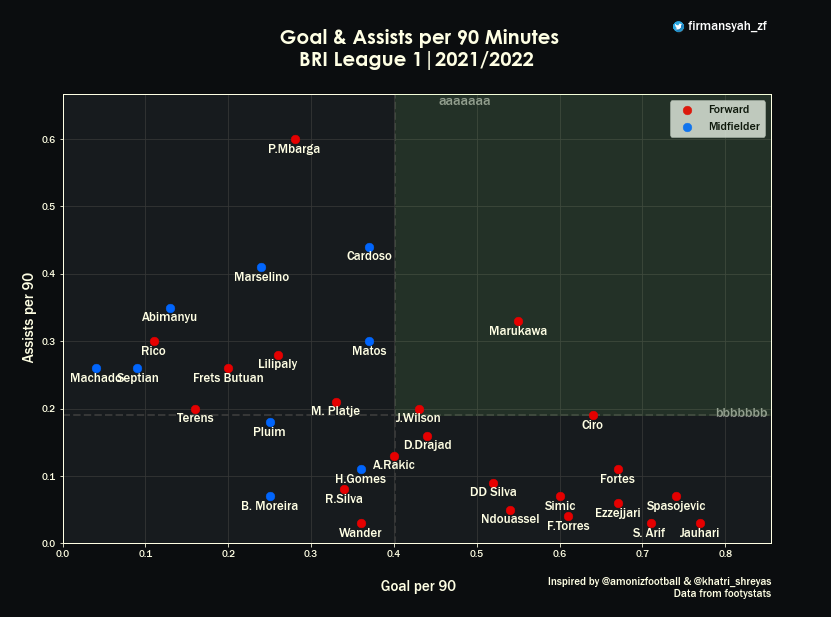

<Figure size 432x288 with 0 Axes>

In [6]:
# Establishing lists for plotting in matplotlib
# x7 = list(defendersa['xA5'])
x8 = list(fw['goal per 90'])
x9 = list(mf['goal per 90'])
# y7 = list(defendersa['npxG6'])
y8 = list(fw['assists per 90'])
y9 = list(mf['assists per 90'])
# n7 = list(defendersa['Player'])
n8 = list(fw['player'])
n9 = list(mf['player'])


# Creating empty plot in desired 'fivethirtyeight' style with gridlines and desired backround colours and sizes, as well
# as aesthetic settings
fig,ax= plt.subplots(figsize=(12,8))
matplotlib.style.use('fivethirtyeight')
fig.patch.set_facecolor('#0b0d0f')
ax.set_facecolor('#171b1e')
ax.grid(True, color='xkcd:dark grey')
ax.spines['bottom'].set_color('xkcd:off white')
ax.spines['top'].set_color('xkcd:off white')
ax.spines['left'].set_color('xkcd:off white')
ax.spines['right'].set_color('xkcd:off white')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.tick_params(axis='x', colors='xkcd:off white')
ax.tick_params(axis='y', colors='xkcd:off white')
plt.text(1.075,0.4,"\n", \
        horizontalalignment='right', verticalalignment='top', color='xkcd:off white', size='18', transform=ax.transAxes)
# plt.text(1.1, -0.075, '\nExcludes players with <900 minutes', \
#          horizontalalignment='right', verticalalignment='top', color='xkcd:off white', \
#              style='italic', transform=ax.transAxes, size='14')

# Setting necessary limits
xlimval3 = max(max(x8), max(x9))*1.01
ylimval3 = max(max(y8), max(y9))*1.01
plt.xlim(0,xlimval3*1.1)
plt.ylim(0,ylimval3*1.1)
# ax.set_xticklabels(['',0.15, 0.3, 0.45, 0.6, 0.75, 0.90])

# labelling chart and axes
ax.set_xlabel('\n Goal per 90\n', color='xkcd:off white', size = 15)
ax.set_ylabel('\n Assists per 90', color='xkcd:off white', size = 15)
ax.set_title("\n Goal & Assists per 90 Minutes\nBRI League 1|2021/2022\n", color='xkcd:off white', size=20,  weight='heavy', family='Century Gothic')
ax.set_position([0.08, 0.08, 0.82, 0.78])

# Using rainbow_label function in matplotlib to label subtitle legend
# words = "Goal vs Assists per 90 in BRI League 1, 2021/2022".split()
# colors = ['xkcd:bright green', 'xkcd:bright green', 'xkcd:off white', 'xkcd:red', 'xkcd:red', 'xkcd:red', \
#          'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white', 'xkcd:off white']
# rainbow_text(0.005, ylimval3*1.12, words, colors, size=18)

# Adding plot points
a = plt.scatter(x=x8,y=y8,s=75, color='xkcd:red', zorder=100)
b = plt.scatter(x=x9,y=y9,s=75,color='xkcd:bright blue', zorder=100)

# plt.text(0.8,0.5,'POOR SHOT QUALITY\n GOOD FINISHING', color='green', size=12)

# Adding European average lines and labels
plt.axhline(y=y_mean, xmin =-100, xmax=100, color='xkcd:dark grey', linestyle='--', linewidth=2)
plt.axvline(x=x_mean, ymin=-100,ymax=100, color='xkcd:dark grey', linestyle = '--', linewidth=2, zorder=0.2)
ax.fill_between([x_mean, 1000], y_mean,1000, alpha=0.1, color='xkcd:light green', zorder=10)
plt.text(x_mean/xlimval3*1.1,0.995,'aaaaaaa', \
         horizontalalignment='center', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)
plt.text(0.995,y_mean/ylimval3*0.96,'bbbbbbb', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:grey', transform=ax.transAxes)

# Different labelling loops- adjust as needed
for i in n8:
    plt.annotate(i, (x8[n8.index(i)], y8[n8.index(i)]-0.020), color='xkcd:off white', \
        horizontalalignment='center', fontsize=13, zorder=100)       
for i in n9:
    plt.annotate(i, (x9[n9.index(i)], y9[n9.index(i)]-0.020), color='xkcd:off white', \
        horizontalalignment='center', fontsize=13, zorder=100)

# Watermark
ax2 = fig.add_axes([0.78,0.965,0.025,0.025])
ax2.axis('off')
img = plt.imread('img/twitter.png')
ax2.imshow(img)
fig.text(0.8,0.9725,' firmansyah_zf ', size=13, weight='bold', color='white')


plt.text(1.0, -0.075, 'Inspired by @amonizfootball & @khatri_shreyas\n Data from footystats', \
         horizontalalignment='right', verticalalignment='top', color='xkcd:off white', weight='heavy',size=11, transform=ax.transAxes,zorder=1000)
ax.legend((a,b), ('Forward','Midfielder'), scatterpoints=1, loc='best', fontsize=12)
plt.show()
plt.savefig('Goal Assists per 90.png', dpi=300)

In [ ]:
Top Goal & Assist Pemain per 90 menit di BRI Liga 1 2021/2022.

Best Player: 
@taiseimarukawa
 

Taisei Marukawa mencetak rata-rata 0,55 goal & 0,33 assist untuk setiap 90 menit bermain. 
Sedangkan Ciro Alves mencetak rata-rata 0,64 goal & 0,20 assist setiap 90 menit.